# Jane Chinwuko
# Batch number: DS2307


# Phase4

# Unsupervised ML (Clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

4.1 "Create 3 clusters as below.

1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's"

4.2 Create DataFrame for each cluster that shows data according to the areas.

4.3 "Analyse your clusters and prepare a report that explains all your observations.

Example -

1. What is impacting more crimes in sensitive areas.
2. What needs to be done to reduce crime.
3. Most safe and unsafe districts.
4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

4.4 Capstone project overall story in your own words. Min 1000 words.

In [1]:
#Importing necessary libraries
import os, re, glob
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Omen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the datasets to a Pandas DataFrame
crimes_IPC = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
crimes_SC = pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
crimes_ST = pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
crimes_children = pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv')
crime_women = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
# To view few rows of our new dataset
crimes_IPC.head()

,State/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,...,4,113,0,18,1,9,0,0,310,637
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,ANDAMAN & NICOBAR ISLANDS,TOTAL,2001,13,0,0,3,0,3,2,...,4,118,0,19,1,9,0,0,323,658
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,14,3,0,1,0,1,2,...,2,92,0,16,3,4,0,0,316,580
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,3,0,1,1,0,1,0,...,0,5,0,1,0,0,0,0,12,28


In [4]:
crimes_IPC=crimes_IPC[['State/UT',
 'DISTRICT',
 'Year',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [5]:
crimes_IPC['State/UT'].unique()
        

array(['ANDAMAN & NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',
       'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL'], dtype=object)

In [6]:
crimes_IPC=crimes_IPC[crimes_IPC['DISTRICT']!='TOTAL']

In [7]:
# To view few rows of our new dataset
crimes_SC.head()

,State/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0,0,0,0,0,0,0,0,0,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,0,0,0
2,ANDAMAN & NICOBAR ISLANDS,TOTAL,2001,0,0,0,0,0,0,0,0,0,0
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,0,0,0,0,0,0,0,0,0,0
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0,0,0,0,0,0,0,0,0,0


In [8]:
crimes_SC['TOTAL CRIMEs AGAINST SC']=crimes_SC.iloc[:,3:].sum(axis=1)
crimes_SC = crimes_SC.drop(['Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against SCs'],axis=1)
crimes_SC=crimes_SC[crimes_SC['DISTRICT']!='TOTAL']
crimes_SC

,State/UT,DISTRICT,Year,TOTAL CRIMEs AGAINST SC
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,0
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0
6,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2003,0
...,...,...,...,...
9012,WEST BENGAL,PURULIA,2012,1
9013,WEST BENGAL,SEALDAH G.R.P.,2012,0
9014,WEST BENGAL,SILIGURI G.R.P.,2012,0
9015,WEST BENGAL,SILIGURI_PC,2012,0


In [9]:
# To view few rows of our new dataset
crimes_ST.head()

,State/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0,0,0,0,0,0,0,0,0,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,0,0,1
2,ANDAMAN & NICOBAR ISLANDS,TOTAL,2001,0,0,0,0,0,0,0,0,0,1
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,0,0,0,0,0,0,0,0,0,1
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0,0,0,0,0,0,0,0,0,0


In [10]:
crimes_ST=crimes_ST[crimes_ST['DISTRICT']!='TOTAL']
crimes_ST['TOTAL CRIMES AGAINST ST']=crimes_ST.iloc[:,3:].sum(axis=1)
crimes_ST = crimes_ST.drop(['Murder','Rape','Kidnapping Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against STs'],axis=1)
crimes_ST

,State/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,1
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,1
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0
6,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2003,1
...,...,...,...,...
9012,WEST BENGAL,PURULIA,2012,1
9013,WEST BENGAL,SEALDAH G.R.P.,2012,0
9014,WEST BENGAL,SILIGURI G.R.P.,2012,0
9015,WEST BENGAL,SILIGURI_PC,2012,8


In [11]:
# To view few rows of our new dataset
crimes_children.head()

,State/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ANDAMAN & NICOBAR ISLANDS,TOTAL,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
crimes_children=crimes_children[crimes_children['DISTRICT']!='TOTAL']
crimes_children.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)
crimes_children=crimes_children[['State/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]
crimes_children

,State/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2001,0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2001,0
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2002,0
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR,2002,0
6,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2003,6
...,...,...,...,...
9009,WEST BENGAL,PURULIA,2012,0
9010,WEST BENGAL,SEALDAH G.R.P.,2012,0
9011,WEST BENGAL,SILIGURI G.R.P.,2012,0
9012,WEST BENGAL,SILIGURI_PC,2012,44


In [13]:
# To view few rows of our new dataset
crime_women.head()

,State/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDAMAN & NICOBAR ISLANDS,A and N ISLANDS,2007,3,9,1,21,2,18,0
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2010,23,8,0,31,10,9,0
2,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2009,18,14,1,29,7,21,0
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2011,13,12,0,14,3,5,0
4,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2008,12,13,2,24,3,25,0


In [14]:
crime_women=crime_women[crime_women['DISTRICT']!='TOTAL']
crime_women['TOTAL CRIMES AGAINST WOMEN']=crime_women.iloc[:,3:].sum(axis=1)
crime_women=crime_women[['State/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]
crime_women

,State/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDAMAN & NICOBAR ISLANDS,A and N ISLANDS,2007,54
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2010,81
2,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2009,90
3,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2011,47
4,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,2008,79
...,...,...,...,...
9012,WEST BENGAL,UTTAR DINAJPUR,2005,299
9013,WEST BENGAL,UTTAR DINAJPUR,2004,281
9014,WEST BENGAL,UTTAR DINAJPUR,2001,158
9015,WEST BENGAL,UTTAR DINAJPUR,2003,149


## Merging the datasets together

In [15]:
combined_data=pd.merge(crimes_IPC,crimes_SC,how='inner',left_on=['State/UT','DISTRICT','Year'],right_on=['State/UT','DISTRICT','Year']).merge(crimes_ST,how='inner',left_on=['State/UT','DISTRICT','Year'],right_on=['State/UT','DISTRICT','Year']).merge(crimes_children,how='inner',left_on=['State/UT','DISTRICT','Year'],right_on=['State/UT','DISTRICT','Year']).merge(crime_women,how='inner',left_on=['State/UT','DISTRICT','Year'],right_on=['State/UT','DISTRICT','Year'])
combined_data=combined_data.groupby(['State/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)
combined_data

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,ANDAMAN & NICOBAR ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,ANDAMAN & NICOBAR ISLANDS,CAR,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,ANDAMAN & NICOBAR ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,ANDAMAN & NICOBAR ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,32,21,123,3,29,3,9,0,3,812,0,8,44,552


## 4.1 CLUSTERING USING THE KMEANS

In [16]:
from sklearn.cluster import KMeans
# Fitting K-Means to the dataset
features =combined_data.iloc[:,2:]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Specify the number of clusters
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
combined_data['cluster'] = kmeans.fit_predict(features_scaled)

In [17]:
combined_data.head(10)

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster
0,ANDAMAN & NICOBAR ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,99,0,1,10,54,0
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,910,0,33,206,458,0
2,ANDAMAN & NICOBAR ISLANDS,CAR,2,0,1,1,0,0,0,0,0,4,0,0,2,2,0
3,ANDAMAN & NICOBAR ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,34,0,3,1,11,0
4,ANDAMAN & NICOBAR ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,8,0,0,7,9,0
5,ANDAMAN & NICOBAR ISLANDS,SOUTH,8,8,7,4,1,65,8,1,4,50,0,4,19,36,0
6,ANDHRA PRADESH,ADILABAD,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583,2
7,ANDHRA PRADESH,ANANTAPUR,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287,2
8,ANDHRA PRADESH,CHITTOOR,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004,2
9,ANDHRA PRADESH,CUDDAPAH,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002,2


#### cluster 0 represents areas that are Peaceful
#### cluster 1 represents areas that are Moderate
#### cluster 2 represents areas that are Sensitive

## Peaceful Areas

## 4.2 Create DataFrame for each cluster that shows data according to the areas.

## Peaceful Areas

In [18]:
#Selecting data showing the peaceful areas
peaceful_area=combined_data[combined_data['cluster']==0]
peaceful_area.head(10)

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster
0,ANDAMAN & NICOBAR ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,99,0,1,10,54,0
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,910,0,33,206,458,0
2,ANDAMAN & NICOBAR ISLANDS,CAR,2,0,1,1,0,0,0,0,0,4,0,0,2,2,0
3,ANDAMAN & NICOBAR ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,34,0,3,1,11,0
4,ANDAMAN & NICOBAR ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,8,0,0,7,9,0
5,ANDAMAN & NICOBAR ISLANDS,SOUTH,8,8,7,4,1,65,8,1,4,50,0,4,19,36,0
12,ANDHRA PRADESH,GUNTAKAL RLY.,75,3,10,15,31,0,4,66,2,75,7,0,7,57,0
14,ANDHRA PRADESH,GUNTUR URBAN,150,69,100,6,62,416,23,14,33,2398,139,24,127,1955,0
26,ANDHRA PRADESH,RAJAHMUNDRY,65,38,75,4,27,354,12,7,12,2104,220,13,68,809,0
28,ANDHRA PRADESH,SECUNDERABAD RLY.,104,7,9,8,54,6,16,169,2,138,9,2,1,53,0


## Moderate Areas

In [19]:
#Selecting data showing the moderate areas
moderate_area=combined_data[combined_data['cluster']==1]
moderate_area

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster
10,ANDHRA PRADESH,CYBERABAD,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411,1
11,ANDHRA PRADESH,EAST GODAVARI,1041,499,780,30,245,5069,768,225,479,31514,2042,223,213,9514,1
13,ANDHRA PRADESH,GUNTUR,1775,526,969,91,347,3509,1204,214,692,22209,1831,354,709,12390,1
15,ANDHRA PRADESH,HYDERABAD CITY,1455,712,1466,121,942,13435,2432,311,433,47343,1293,76,872,19685,1
16,ANDHRA PRADESH,KARIMNAGAR,1674,853,1534,91,344,3258,2011,62,685,31334,3331,505,2406,16110,1
17,ANDHRA PRADESH,KHAMMAM,1337,721,919,63,195,2717,1667,69,439,18111,858,623,759,10518,1
18,ANDHRA PRADESH,KRISHNA,842,528,650,22,126,2392,468,88,545,27498,1973,248,879,10742,1
19,ANDHRA PRADESH,KURNOOL,1529,419,785,101,215,2494,1340,114,380,19228,3450,288,527,9850,1
20,ANDHRA PRADESH,MAHABOOBNAGAR,2171,864,870,90,347,3014,1265,73,650,19861,2304,529,694,7191,1
22,ANDHRA PRADESH,NALGONDA,1446,698,872,90,347,2838,1612,70,845,19199,2692,886,958,9744,1


## Sensitive Areas

In [20]:
#Selecting data showing the sensitive areas
sensitive_area=combined_data[combined_data['cluster']==2]
sensitive_area

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster
6,ANDHRA PRADESH,ADILABAD,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583,2
7,ANDHRA PRADESH,ANANTAPUR,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287,2
8,ANDHRA PRADESH,CHITTOOR,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004,2
9,ANDHRA PRADESH,CUDDAPAH,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002,2
21,ANDHRA PRADESH,MEDAK,1460,538,639,117,309,3440,841,71,645,21372,1413,200,601,6911,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,WEST BENGAL,HOWRAH,666,419,913,144,256,259,1828,24,52,1898,2,1,29,7441,2
813,WEST BENGAL,MALDA,885,1331,1323,62,203,143,654,327,47,3357,6,15,237,7811,2
817,WEST BENGAL,PASCHIM MIDNAPUR,1350,705,806,224,397,250,3337,39,249,1298,6,11,29,7875,2
818,WEST BENGAL,PURAB MIDNAPUR,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020,2


## 4.3 Analyse your clusters and prepare a report that explains all your observations

## 4.3.3 Most safe and unsafe districts.

### 15 MOST SAFEST AREAS

In [21]:
peaceful_area['OVERALL CRIME']=peaceful_area.iloc[:,2:].sum(axis=1)
peaceful_area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
peaceful=peaceful_area.reset_index().drop(['index'],axis=1).head(15)
peaceful

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster,OVERALL CRIME
0,DELHI,S.T.F.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,MANIPUR,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HIMACHAL PRADESH,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,JAMMU & KASHMIR,RAILWAYS KATRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ASSAM,BIEO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,JAMMU & KASHMIR,RAILWAYS JAMMU,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
6,JAMMU & KASHMIR,RAILWAYS KMR,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3
7,TRIPURA,G.R.P.,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,3
8,JAMMU & KASHMIR,CRIME SRINAGAR,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5
9,DELHI,SPL CELL,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,6


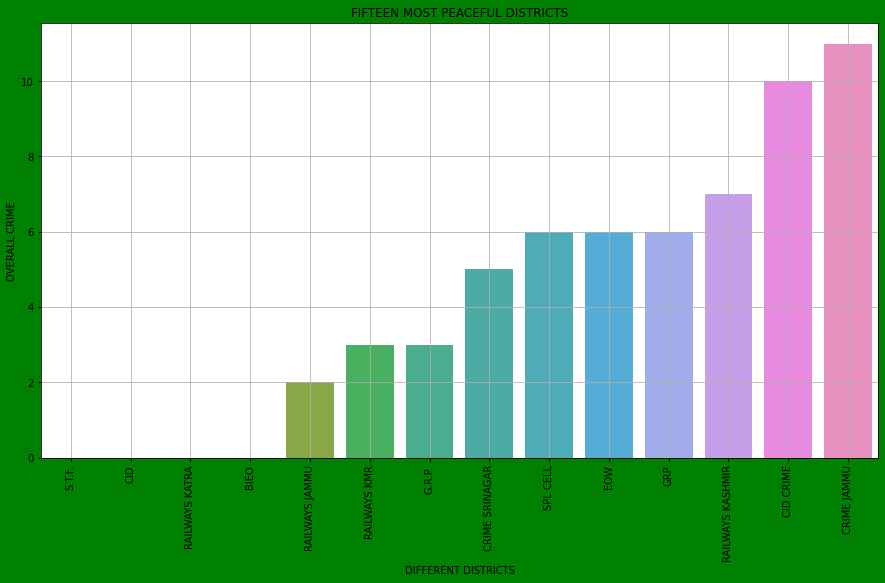

In [22]:
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='Green')
sns.barplot(x=peaceful['DISTRICT'],y=peaceful['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICTS")
plt.title("FIFTEEN MOST PEACEFUL DISTRICTS")
plt.grid()
plt.show()

### 10 MOST MODERATE AREAS

In [23]:
moderate_area['OVERALL CRIME']=moderate_area.iloc[:,2:].sum(axis=1)
moderate_area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
moderate=moderate_area.reset_index().drop(['index'],axis=1).head(10)
moderate

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster,OVERALL CRIME
0,DELHI,NORTH-WEST,594,695,2520,44,827,2325,42,11,31,1630,10,0,2968,4543,1,16241
1,DELHI,EAST,570,643,2793,64,732,2253,148,41,72,2649,41,0,2647,5518,1,18172
2,JHARKHAND,RANCHI,2618,791,992,759,1769,1963,2211,17,161,4364,174,364,29,2588,1,18801
3,DELHI,SOUTH,713,839,2390,38,798,4163,173,32,58,2167,45,0,2107,5585,1,19109
4,UTTAR PRADESH,GHAZIABAD,2227,357,2340,144,1117,2237,1299,119,54,731,724,6,1188,6973,1,19517
5,DELHI,WEST,739,804,2699,21,565,2876,46,30,83,3072,21,0,2935,6021,1,19913
6,GUJARAT,SURAT COMMR.,1108,311,1150,236,863,4739,1207,274,103,6788,151,73,821,4567,1,22392
7,UTTAR PRADESH,BAREILLY,2070,673,1754,191,831,1662,1290,81,66,4640,1487,8,938,7041,1,22733
8,UTTAR PRADESH,MEERUT,2398,542,2082,151,1799,2255,1963,161,39,689,1226,0,1305,8225,1,22836
9,UTTAR PRADESH,ALLAHABAD,1652,430,1425,83,677,2861,1847,154,189,5073,2259,19,787,5769,1,23226


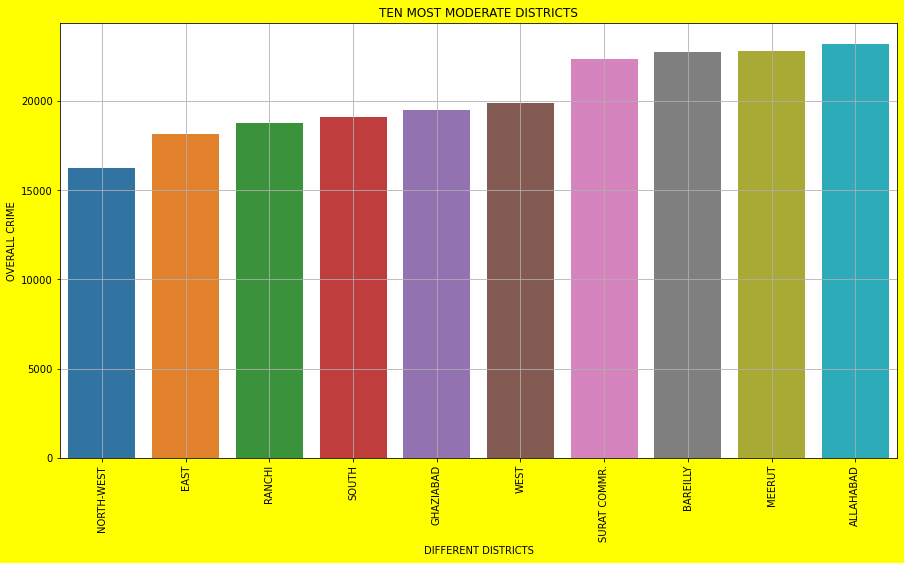

In [24]:
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='yellow')
sns.barplot(x=moderate['DISTRICT'],y=moderate['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICTS")
plt.title("TEN MOST MODERATE DISTRICTS")
plt.grid()
plt.show()

In [25]:
sensitive_area['OVERALL CRIME']=sensitive_area.iloc[:,2:].sum(axis=1)
sensitive_area.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
sensitive=sensitive_area.reset_index().drop(['index'],axis=1).head(15)
sensitive

,State/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMEs AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,cluster,OVERALL CRIME
0,KERALA,KOLLAM,381,558,238,87,473,3284,6415,54,434,22084,446,27,606,7927,2,43016
1,RAJASTHAN,CHITTORGARH,512,738,1709,23,385,2857,1836,26,438,19974,1388,655,179,8964,2,39686
2,ANDHRA PRADESH,NIZAMABAD,1339,412,630,123,329,3496,816,68,448,21756,773,245,383,7839,2,38659
3,ANDHRA PRADESH,MEDAK,1460,538,639,117,309,3440,841,71,645,21372,1413,200,601,6911,2,38559
4,KERALA,TRIVANDRUM RURAL,297,578,263,87,621,3120,5512,42,295,17754,436,47,617,7510,2,37181
5,KERALA,KOTTAYAM,257,394,204,53,549,3594,4571,51,190,20453,358,57,336,5376,2,36445
6,KERALA,KANNUR,264,419,144,78,609,2687,9807,36,640,13662,321,124,311,5086,2,34190
7,TAMIL NADU,SALEM RURAL,806,402,985,64,258,1043,2545,24,429,21864,478,16,524,4125,2,33565
8,MAHARASHTRA,NANDED,992,396,455,278,907,4347,3266,40,743,15343,534,41,866,5283,2,33493
9,KERALA,MALAPPURAM,255,691,170,93,370,3618,7386,57,292,10480,527,49,394,9002,2,33386


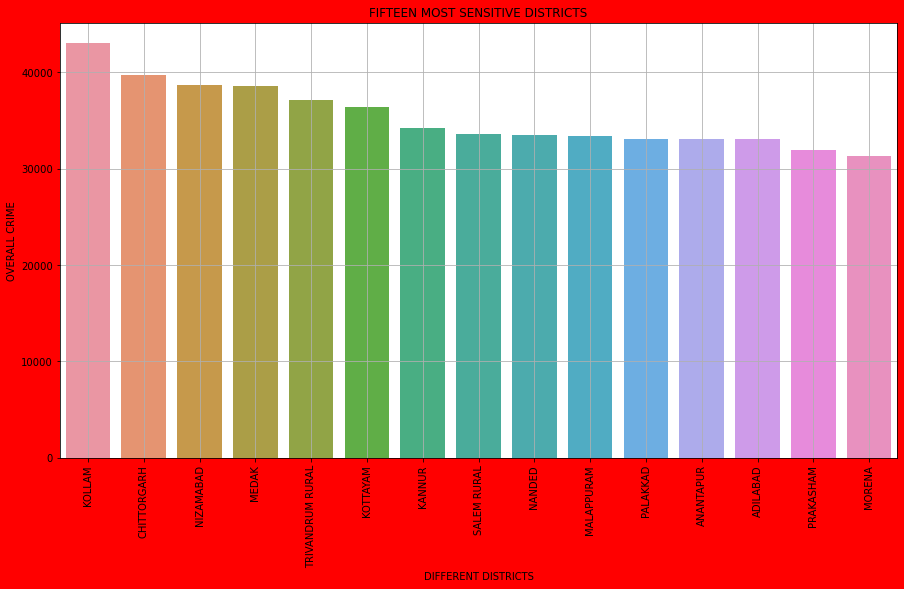

In [26]:
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='red')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICTS")
plt.title("FIFTEEN MOST SENSITIVE DISTRICTS")
plt.grid()
plt.show()

## 4.3.1 What is impacting more crimes in sensitive areas?

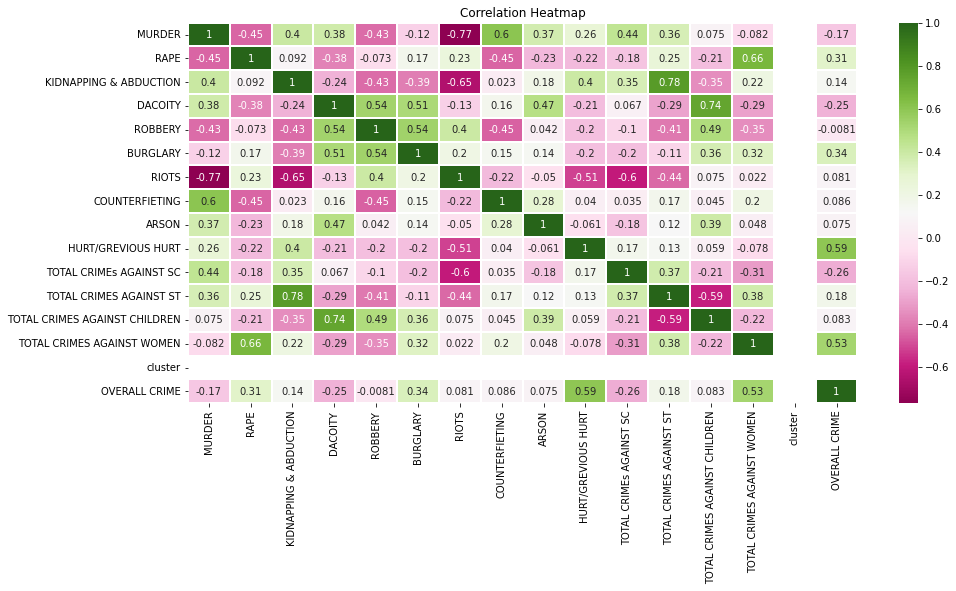

In [27]:
# Using heatmap to visualize the correlation between the features.
plt.figure(figsize=(15,7))
sns.heatmap(sensitive.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, we can see that there is a correlation between overall crime and hurt/grievous hurt in the sensitive areas. We can also see correlations between:

#### Total Crimes against ST and  kidnapping&abduction.
#### Total Crimes against children and  Dacoity.
#### Total Crimes against Women and Rape

Sensitive locations are often defined as areas that may be socially, politically, or racially heated; a variety of factors might impact the dynamics of crime in these areas. 

Higher crime rates, particularly among young people, can be attributed to a lack of educational and career options.

Long-standing tensions can be exacerbated by unresolved issues and historical grievances, which may lead to criminal activity.

Specific groups that are discriminated against and marginalised in sensitive areas may become resentful and resort to criminal activity as a method of protest or revenge.

If communities in sensitive areas have a distrust of law enforcement agencies, it may lead to underreporting of crimes and hinder effective crime prevention.


It is frequently necessary to take a thorough, context-specific strategy to crime control in sensitive locations, taking into account the particular dynamics of each place. Various approaches could involve involving the community, resolving conflicts through projects, promoting economic growth, and fostering confidence between the public and law enforcement. 

##  4.3.2 What needs to be done to reduce crime.

India has a complicated and diverse criminal justice system, thus reducing crime there calls for a coordinated and all-encompassing strategy. In order to reduce crime, it is important to consider the following strategies:

1) Strengthen community policing initiatives to build trust between law enforcement and communities. To solve particular neighbourhood issues, promote cooperation between the police, local groups, and people.

2) Put in place educational initiatives to encourage a culture of lawfulness and increase public awareness of the negative effects of crime. Focus on educational initiatives that empower individuals, especially youth, to make positive life choices.

3) Encourage the creation of jobs and economic growth in order to address the problems of unemployment and poverty, which are frequently connected to criminal activity. Implement skill development programs to enhance employability.

4) Boost social welfare initiatives that help disadvantaged groups including the homeless, abused women and girls, and at-risk children.

5) Build more secure and safe surroundings, invest in infrastructure development and urban planning. Enhance street lighting, public spaces, and transportation systems to deter criminal activities.

6) Implement measures to address corruption within law enforcement agencies and other institutions. Promote transparency, accountability, and ethical conduct in public services.

7) Streamline and expedite legal processes to ensure swift and fair justice. Increase the capacity of the judicial system to handle cases efficiently.

8) Provide recreational opportunities, mentorship programmes, and youth engagement events to keep youth engaged in a positive way. Develop rehabilitation programs for individuals involved in criminal activities to facilitate their reintegration into society.

9) Put current technologies to use for monitoring and crime detection. When allocating resources, look for patterns in crime and use artificial intelligence and data analytics to help.

10) Conduct public awareness campaigns on crime prevention, safety measures, and reporting mechanisms. Encourage citizens to actively participate in crime prevention efforts.

11) Encourage the implementation of restorative justice initiatives that aim to rehabilitate criminals and mend the harm they have caused.

To effectively combat crime, multiple parties must be involved, such as government agencies, law enforcement, communities, and civil society organisations. The approach must be comprehensive, holistic, and long-term in nature. In order to make environments safer and more secure for all inhabitants, cooperation and persistent efforts on several fronts are necessary.

## 4.3.4  Capstone project overall story in your own words. Min 1000 words.

India, officially the Republic of India, is a South Asian country. It has a democratic government system and is the most populated and the seventh-largest country in terms of area. It is important to understand India's population, literacy rates, and criminal activity to plan the distribution of infrastructure, healthcare, and education facilities effectively, ensuring that resources are directed where they are most needed. Population dynamics, literacy rates, and crime trends can all be used to better influence government policy, especially in social welfare, education, and law enforcement. Social development and literacy rates are closely related. Raising literacy rates is linked to improved quality of life, greater civic engagement, and improved health awareness. Law enforcement organisations can more effectively distribute resources when they better understand crime patterns. It supports the creation of focused policies and programmes for crime prevention that consider the unique difficulties in various geographic areas. To make well-informed decisions and create successful policies that advance societal growth, it is essential to have a thorough understanding of population dynamics, literacy rates, and crime patterns.

In this project, we looked closely at the population, literacy rate and different crimes committed in India from 2001 to 2012. For the population of India, we got our figures from Wikipedia. The statistics for the literacy rate were scrapped from the census2011 website. From the statistics gathered, the population of India was estimated to be 1.21 billion as of the 2011 Census. India is made up of 28 states and 7 Union Territories. The literacy rate of India is 74.04 while the area is 3,287,240(Km²). Of the 1.21 billion Indians, 833 million (69%) live in rural areas, while 373 million (31%) live in urban areas. 623,021,843 (51%) of the population are male, while that of females is 587,447,730 (49%). The top three states in terms of highest population are Uttar Pradesh(199,812,341), Maharashtra(112,374,333) and Bihar(104,099,452). In terms of literacy, Kerala(94), Lakshadweep(91.85), and Mizoram(91.33) are the top three with the highest literacy rate. Bihar(61.8) is the state with the lowest literacy rate. The male gender had a higher literacy rate than the female. This can be attributed to the fact that, in some areas, gender norms have prioritised men's education above women's. This may lead to a historical disparity in the rates of literacy. A perception may have existed that investing in male education will improve the family's economic situation.
We had a total of 23,940,654 Indian Penal Code (IPC) crimes recorded from 2001 to 2012. Madhya Pradesh(2,413,770), Maharashtra(2,273,436) and Tamil Nadu(2,060,176) are the top three states with the highest total IPC crimes reported in the country. There was a decrease in IPC crimes between 2002 and 2003. After 2003, we saw an increase in the total crimes.
Uttar Pradesh(65,443), Bihar(41,245) and Maharastra(32,767) are the top three states with high murder cases from 2001 to 2012. Madhya Pradesh(36,087), West Bengal(20,787) and Uttar Pradesh(19058) recorded the top 3 Rape cases. Lakshadweep(7) recorded the lowest number of rape cases.
Three top highest cases of Kidnapping & Abduction were reported in Uttar Pradesh, Rajasthan and Assam. Maharastra had the highest number of recorded theft/robbery/burglary cases. Maharastra had the highest number of robbery cases recorded. Bihar had the highest number of dacoity cases recorded. We can see that Bihar, Kerala and Maharastra are the top three states with riot cases from 2001 to 2012.

From the dashboard analysis of the Juveniles apprehended under IPC, we can see that most of them were in the age group of 16-18 years. Most of the juveniles were from the Madhya Pradesh state. A total of 70,486 juveniles were apprehended in 2008.
In India, crimes against minors such as rape, kidnapping, murder, human trafficking, and the importation of girls continue to be the most common crimes. 477,855 cases of crimes against children were reported in 2011, of which 21.51 were rape or sexual assault. Of these, 46.24 cases involved murder alone, out of all the different crimes against children.
Madhya Pradesh accounted for 14% of total crime reported in the country, followed by Maharashtra (13%), Andhra Pradesh (12%) and Uttar Pradesh (11%).

We used the Kmean algorithm to cluster the various crimes into peaceful, moderate and sensitive areas. We categorise states with lower crimes as peaceful areas and those with higher crime rates as sensitive areas. 
We also looked at the relationship between literacy and total crime. We saw a negative correlation between crime and the literacy rate, which means that increased literacy will decrease the crime rate. Literate people are more likely to be aware of the rules governing crimes. This can make it easier for people to identify and report such crimes and make it easier for them to deal with the legal system. Another benefit of literacy is that it can make information more widely available, such as that regarding self-defence tactics, crime prevention, and victim assistance programmes. By doing so, people can lessen the likelihood of becoming the target of criminal activity. We also saw a positive correlation between total crime and population. An increase in population is likely to increase the overall crime. Larger populations typically lead to higher population densities since more people live closer to one another. Denser populations may have higher rates of interpersonal disputes, which in turn may increase the likelihood of certain crimes. Competition for housing, employment, and resources can result in social pressure in densely crowded areas. This tension can lead to anger and, in some cases, criminal action.

Overall, we can see that Maharastra appears at the top in almost all the crimes. Maharashtra has highly urbanised regions, including Mumbai, Pune, and Nagpur. Urban areas often experience higher crime rates due to population density, anonymity, and increased opportunities for criminal activities. Migrants from all over the nation migrate to Maharashtra in search of employment possibilities. Migration on a large scale can put a burden on resources, exacerbate social tensions, and even have an impact on crime rates. Maharashtra, being a state with considerable economic importance, could draw organised crime, including that of the mafia, smuggling, and other illegal enterprises. 

Though the number of crimes recorded in India has increased overall, this suggests that major issues still need to be resolved. Law enforcement must be improved, public awareness must be increased, and the government must address the socioeconomic causes of increased crime. There is a need to Strengthen the community-police partnerships to build trust. Include local communities in decision-making and efforts to avoid crime. The government needs to invest in education. Improve access to high-quality education, especially for underprivileged and marginalised communities. Provide and encourage job opportunities, particularly for young people. Put in place programmes for skill development to improve employability. Determine criminal hotspots using data-driven methods, then distribute resources appropriately. Put targeted actions into place where there is a greater crime rate. Create initiatives involving at-risk young people in constructive pursuits, including athletics, the arts, and career preparation. Programmes for juvenile offenders to receive rehabilitation should be put in place. Government needs to adopt crisis intervention plans to deal with pressing problems in areas where people are most vulnerable. During times of social or economic crises, provide resources and support. Construct and execute restorative justice initiatives that prioritise mending damage and reintegrating criminals into society. 
India may move closer to decreasing crime and enhancing citizen safety with these strategies in place.
